In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing libraries

In [2]:
df=pd.read_csv('Titanic Train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Loading the dataset. Here our target variable is "Survived".

In [3]:
df=pd.DataFrame(data=df)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Loading the Dataset in the DataFrame

In [4]:
df.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,NaN,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S


Taking out 15 samples from the dataset for our further understanding of the data.

In [5]:
df.shape

(891, 12)

There are 891 rows and 12 columns present in the dataset.

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# About The Columns: It gives us the names of all the columns.
    1. PassengerId : It gives us the ID of the passenger . It is unique.
    2. Survived : It says whether the passenger has survived(1) or not(0). It is our target variable.    
    3. Pclass: The ticket class of passengers. 1st  (upper class), 2nd (middle), or 3rd (lower).
    4. Name : Name of the passenger
    5. Sex : gender of the passenger
    6. Age : Age of the passenger 
    7. SibSp : The no. of siblings/spouses of a particular passenger who were there on the ship.
    8. Parch : The no. of parents/children of a particular passenger who were there on the ship.
    9. Ticket : ticket number
    10. Fare :  Passenger fare (like 1st class ticket fare must be greater than 2nd pr 3rd class ticket right).
    11. Cabin : cabin number
    12. Embarked : Port of Embarkation; From where that passenger took the ship. ( C = Cherbourg, Q = Queenstown, S = Southampton)

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Here we get the data types of each column.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we get the data type count, non-null value count of each column and memory usage od the DataFrame. 

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are few null values which we will have to treat.

In [10]:
df['Survived'].unique()

array([0, 1], dtype=int64)

There are only two values in the dataset. O --> Not Survived and 1 --> Survived

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

549 people did not survived whereas 342 people survived the sink.

# EDA

# Univariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

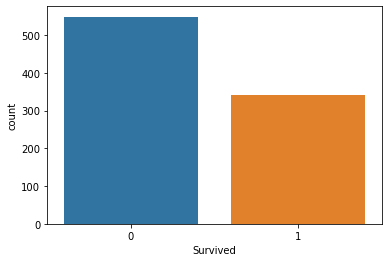

In [12]:
sns.countplot(df['Survived'])

There is huge class imbalance which we will have to treat.

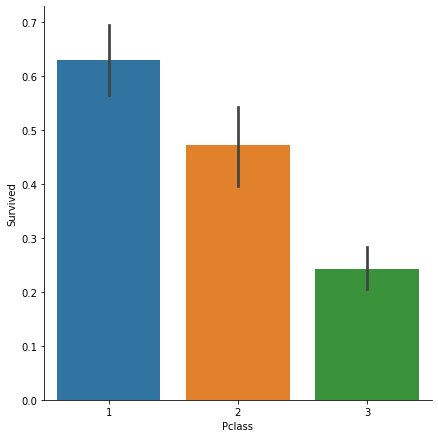

In [13]:
sns.catplot(x = "Pclass", y="Survived", data = df, kind="bar", height = 6)

So a first class passenger has more chances of survival over 2nd and 3rd class passengers & Similarly the 2nd class passengers have more chances of survival over 3rd class passengers.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

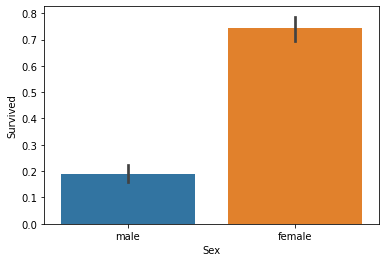

In [14]:
sns.barplot(x="Sex", y="Survived", data=df)

Here we can see that woman have more chances of survival over man.

In [15]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

There are many unique values in Fare and rest all other categorical, hence we can't encode them.

In [16]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

There are 7 unique values in SibSp

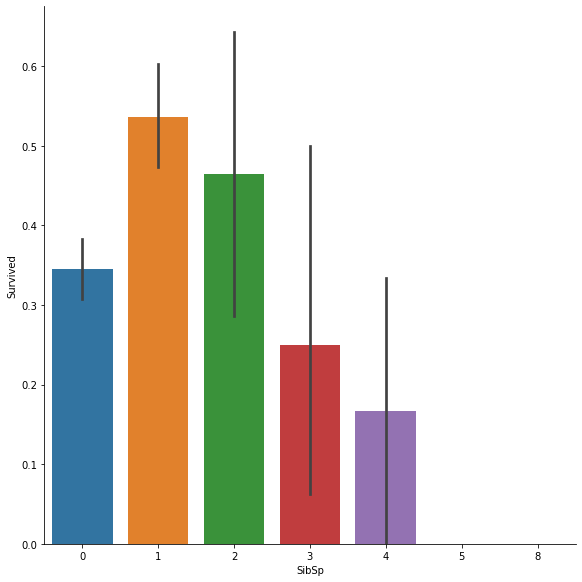

In [17]:
sns.catplot(x = "SibSp", y = "Survived", data = df, kind="bar", height = 8)

Passengers having 1 or 2 siblings/Spouse have good chances of survival.

More no. of siblings : Fewer chances of survival.

No sibling/spouse : average chance of survival

<AxesSubplot:xlabel='Age', ylabel='Density'>

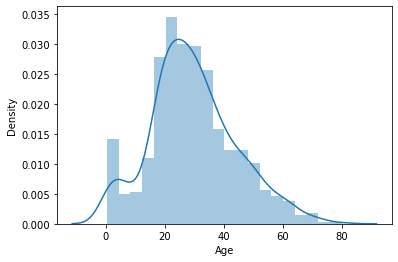

In [18]:
sns.distplot(df["Age"])

More age : Less Chance of survival. Let's study the same data with bar plot

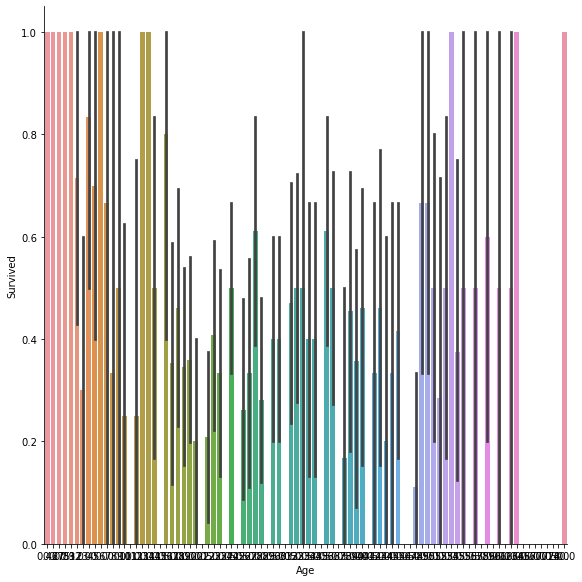

In [19]:
sns.catplot(x = "Age", y = "Survived", data = df, kind="bar", height = 8)

We have a large range of data in Age column hence bar plot is not suitable for such study unless we increase the bin size.

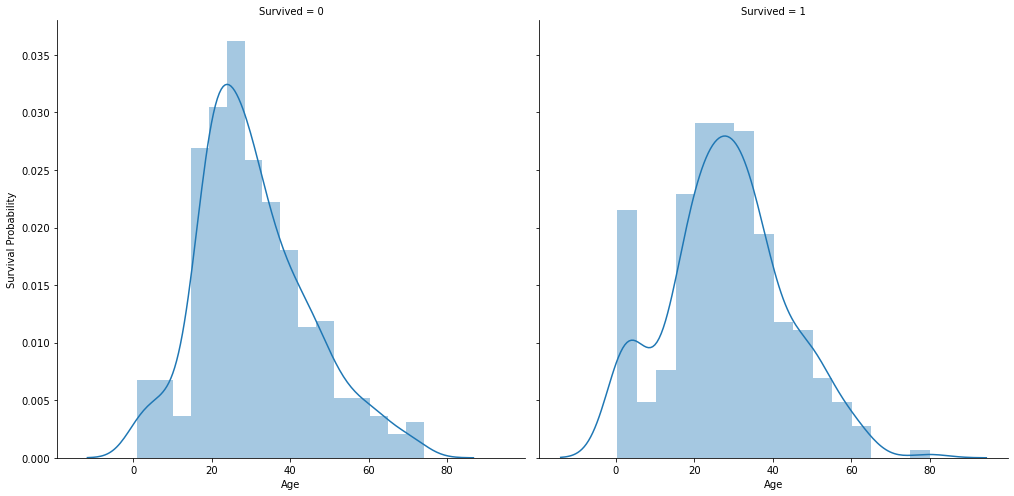

In [20]:
ageplot = sns.FacetGrid(df, col="Survived", height = 7)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")

Here also we are getting same conclusion : More age -> less chances of survival!

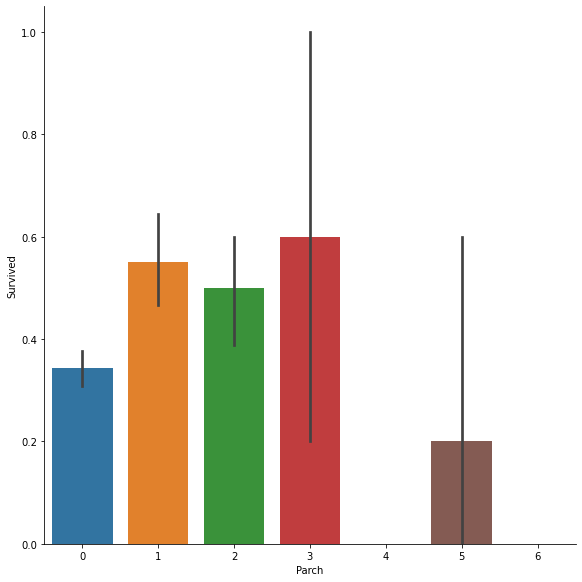

In [21]:
sns.catplot(x = "Parch", y = "Survived", data = df, kind="bar", height = 8)

Passengers having 1, 2  or 3 Parents/children have good chances of survival.

More no. of Children : Fewer chances of survival.

No Parent/Children : average chances of survival

In [22]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

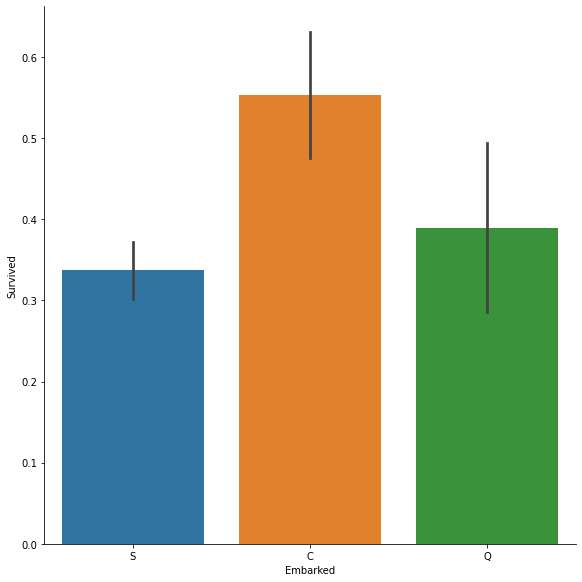

In [23]:
sns.catplot(x = "Embarked", y = "Survived", data = df, kind="bar", height = 8)

People who took the ship from C = Cherbourg have more chances of survival followed by Q = Queenstown and then S = Southampton.

In [24]:
le = LabelEncoder() 
list=['Sex',"Embarked"]
for l in list:
    df[l]=le.fit_transform(df[l])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


We have encoded the Sex and Embarked into ordinal data for EDA purpose.

In [25]:
delete = ['PassengerId','Name','Ticket','Cabin']
df.drop(delete,axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


There are some features which have nothing to do with survival probability like PassengerId, Ticket number, Cabin number and also the name of the passenger. So we can safely drop them before building our ml model.

# Bivariate Analysis

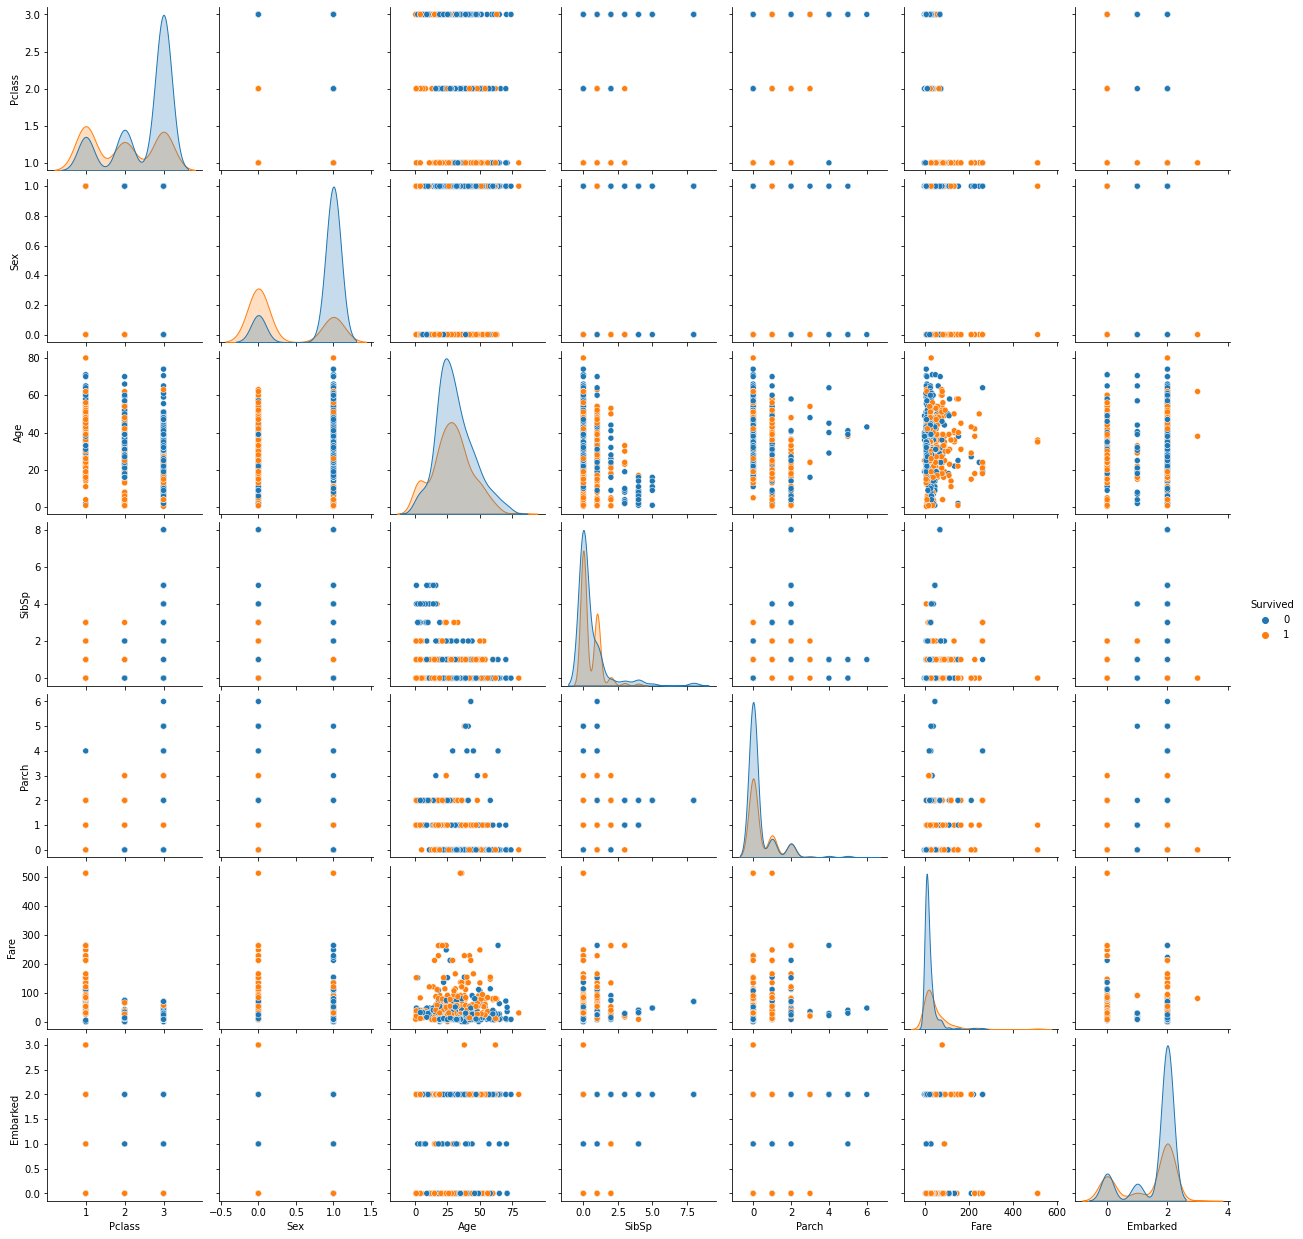

In [26]:
sns.pairplot(df,hue="Survived")

It gives us the distribution of single variable and relationship of one variable with all the other variables.

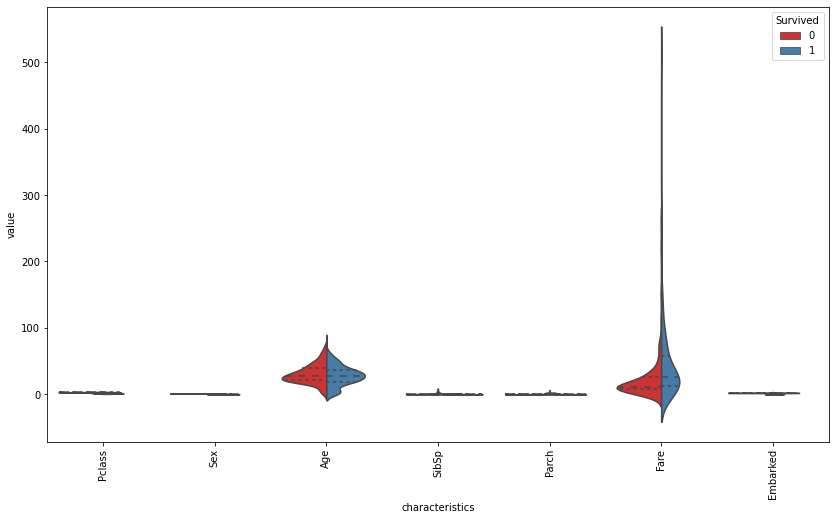

In [27]:
df_div = pd.melt(df, "Survived", var_name="characteristics")
plt.figure(figsize=(14,8))
v=sns.violinplot(x="characteristics",y="value",hue="Survived",split=True,data=df_div,inner='quartile',palette='Set1')
df_no_class = df.drop(["Survived"],axis=1)
v.set_xticklabels(rotation=90,labels=df_no_class.columns);

It represents the distribution of classification characteristics. Since there are few missing values , we have to treat it , standardize the data and only then we could get the conclusion from this plot. So we now move onto  the heatmap.

# Multivariate Analysis

In [28]:
dfc = df.corr()
dfc

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000


It gives the correlation of each variable with every other variable. Let's study it more briefly with the help of a heatmap.

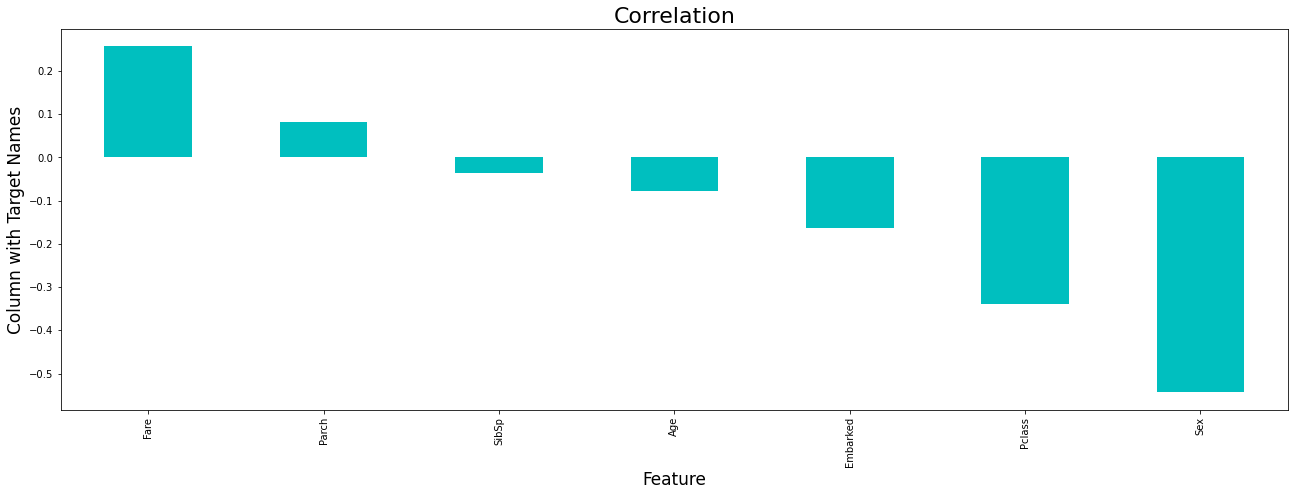

In [29]:
plt.figure(figsize=(22,7))
dfc['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.ylabel('Column with Target Names',fontsize=17)
plt.xlabel('Feature',fontsize=17)
plt.title('Correlation',fontsize=22)
plt.show()

Only Fare and Parch have positive Correlation whereas all the other features have negative correlation.

<AxesSubplot:>

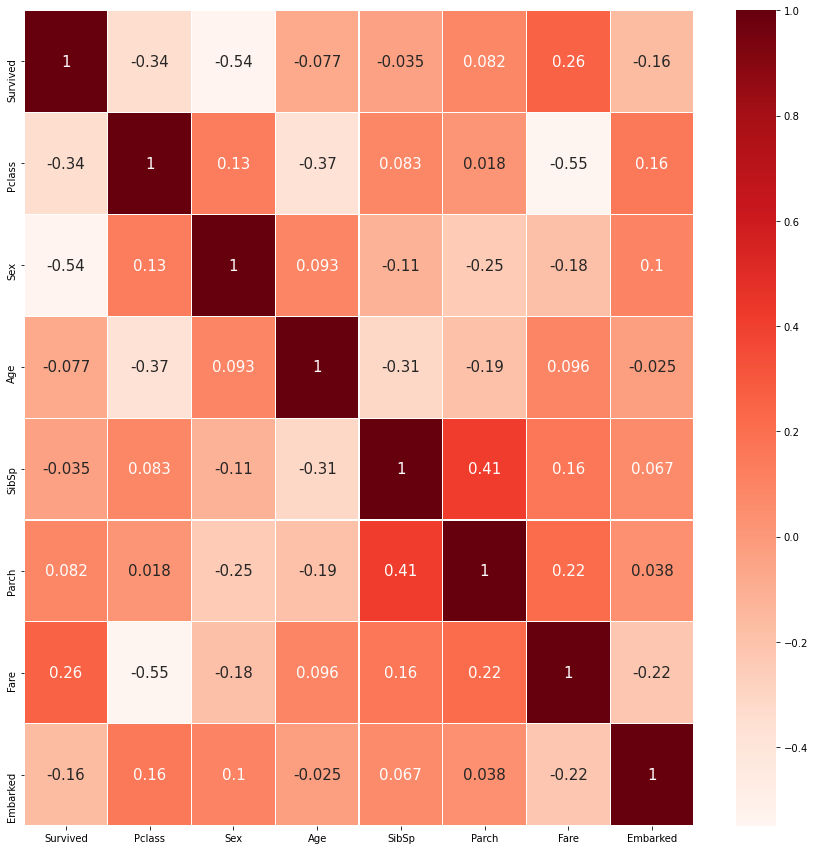

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(dfc, linewidths=.1, cmap="Reds", annot=True, annot_kws={"size":15})

The blocks with the darkest colors have high correlation with eachother and that with lightest color have the least correlation.
SibSp gives -0.035 against Survived which means SibSp has the least correlation with the target variable. Then Parch has a 0.082 value which shows very little correlation. Then Age, again no correlation. In the end, we have Fare whose value of correlation with the Survived variable is 0.26 which shows that the more the fare is, the more are the chances of survival.


In [31]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Here we see that Age has nan values . Let's visualize this with a heatmap.

<AxesSubplot:>

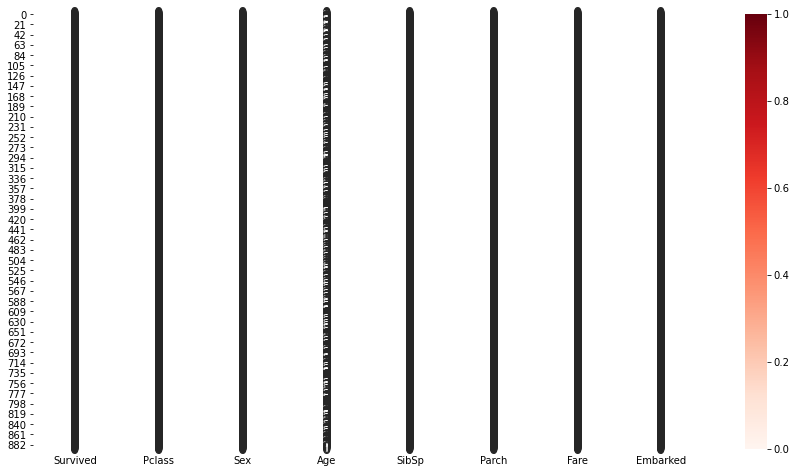

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), linewidths=.1, cmap="Reds", annot=True, annot_kws={"size":15})

Age has blank shades in the plot which says it has null value in it. Now we will have to treat it.

In [33]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


This gives us the description of complete dataset. Let's visualize it with the heatmap.

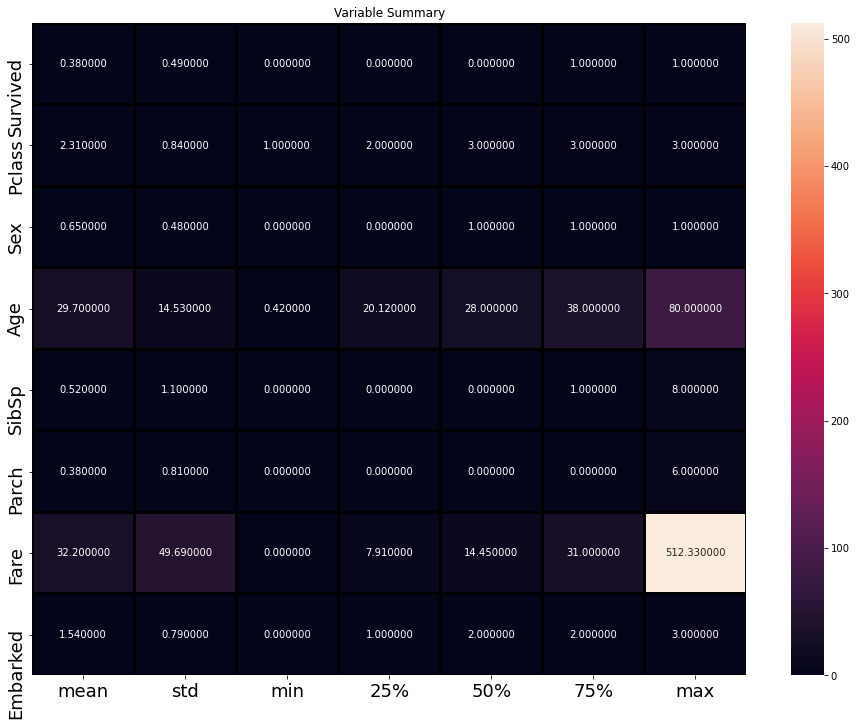

In [34]:
plt.figure(figsize=(16,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

# Treating Missing Values:

In [35]:
df["Age"]=df["Age"].replace(np.NaN,df['Age'].mean())
df['Age'].isnull().sum()

0

We have replaced the NaN values with the mean . And now there are no null values. 

# Outliers and Skewness

Since this is a classification Problem we do not have to treat Outliers or Skewness.

# Building Machine Learning Models : 

In [36]:
dfx= df.iloc[:,1:]
dfx

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


We have fetched all the input variables into 'dfx'

In [37]:
dfy = df.iloc[:,0]
dfy

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

dfy is our target variable.

<AxesSubplot:xlabel='Survived', ylabel='count'>

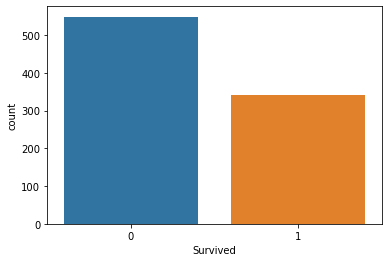

In [38]:
sns.countplot(dfy)

We have class imbalance 

# Treating Class Imbalance

In [39]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y = smt.fit_resample(dfx,dfy)
y

0       0
1       1
2       1
3       1
4       0
       ..
1093    1
1094    1
1095    1
1096    1
1097    1
Name: Survived, Length: 1098, dtype: int64

Treating calss imbalance by over_sampling

<AxesSubplot:xlabel='Survived', ylabel='count'>

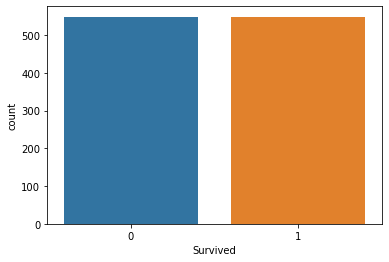

In [40]:
sns.countplot(y)

Now there is no class imbalance

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=52)

We have splitted the data for training and testing. Now We are going to fit our model on 4 different classification algorithms namely Random Forest Classifier, K-Neighbor Classifier, Decision Tree Classifier, and Support Vector Machine. And eventually will compare them.

# Random Forest Classifier

In [42]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8545454545454545
[[98 17]
 [15 90]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       115
           1       0.84      0.86      0.85       105

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



Accuracy of Random Forest Classifier = 85.45%

# KNeighbors Clasifier

In [43]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
predkn=kn.predict(x_test)
print(accuracy_score(y_test,predkn))
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

0.7954545454545454
[[83 32]
 [13 92]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.79       115
           1       0.74      0.88      0.80       105

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.81      0.80      0.79       220



Accuracy of K-Neighbor Classifier = 79.54%

# Decision Tree Classifier

In [44]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8454545454545455
[[96 19]
 [15 90]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       115
           1       0.83      0.86      0.84       105

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



Accuracy of Decision Tree Classifier =  84.54%

# Support Vector Machine Classifier

In [45]:
sv = SVC()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=14)
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
predsv=sv.predict(xtest)
print(accuracy_score(ytest,predsv))
print(confusion_matrix(ytest,predsv))
print(classification_report(ytest,predsv))

0.7181818181818181
[[91 23]
 [39 67]]
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       114
           1       0.74      0.63      0.68       106

    accuracy                           0.72       220
   macro avg       0.72      0.72      0.71       220
weighted avg       0.72      0.72      0.72       220



Accuracy of Support Vector Machine Classifier =  71.81%

# Accuracy Score of all the Models

In [46]:
print("Accuracy of Random Forest Classifier =",accuracy_score(y_test,predrf)*100)
print("Accuracy of K-Neighbor Classifier =",accuracy_score(y_test,predkn)*100)
print("Accuracy of Decision Tree Classifier = ",accuracy_score(y_test,preddt)*100)
print("Accuracy of Support Vector Machine Classifier = ",accuracy_score(ytest,predsv)*100)

Accuracy of Random Forest Classifier = 85.45454545454545
Accuracy of K-Neighbor Classifier = 79.54545454545455
Accuracy of Decision Tree Classifier =  84.54545454545455
Accuracy of Support Vector Machine Classifier =  71.81818181818181


We have printed accuracy of all the models together.

# Cross Validation Score

In [47]:
print("CVS for RandomForest Classifier =",cvs(rf,x,y,cv=5).mean()*100)
print("CVS for KNeighbors Classifier =",cvs(kn,x,y,cv=5).mean()*100)
print("CVS for DecisionTree Classifier =",cvs(dt,x,y,cv=5).mean()*100)
print("CVS for Support Vector Machine Classifier =",cvs(sv,x,y,cv=5).mean()*100)

CVS for RandomForest Classifier = 83.3420506434205
CVS for KNeighbors Classifier = 73.50228310502283
CVS for DecisionTree Classifier = 79.6068908260689
CVS for Support Vector Machine Classifier = 65.39227895392278


We will use RandomForest Classifier because it has the lease difference of accuracy and cv score.

# Hyper Parameter Tuning

In [48]:
parameter={'n_estimators':np.arange(50,350,50),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'class_weight':['balanced', 'balanced_subsample']}
gvc = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gvc.fit(x_train,y_train)
gvc.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 50}

We get the best parameters to be used in RandomForestClassifier() to increase it's accuracy.

In [49]:
Titanic = RandomForestClassifier(criterion='entropy',n_estimators=50,max_features='log2',class_weight='balanced_subsample')
Titanic.fit(x_train,y_train)
pred=Titanic.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.27272727272727


The accuracy of our Hyper tuned Random forest classifier = 87.27%

# AUC-ROC CURVE

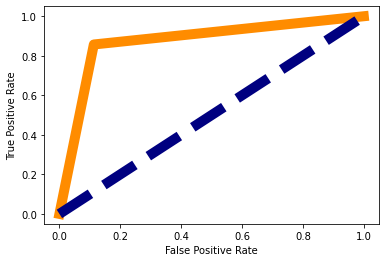

In [50]:
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE")
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Since the model without missing values and class imbalance is working welll. Hence we will choose that only.

# Model Saving

In [52]:
import pickle
filename = 'Titanic.pkl'
pickle.dump(Titanic,open(filename,'wb'))

We have saved our final model .

# Conclusion

In [54]:
a= np.array(y_test)
predicted = np.array(rf.predict(x_test))
titanic=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
titanic

,Original,Predicted
0,1,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
215,0,0
216,1,1
217,1,0
218,1,1


We can see that there are few errors but the majority of data is predicted very well. 